In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/Swiss_bank_notes.csv', sep='\t', header=0, index_col=False)

In [3]:
df.head()

,Length,Left,Right,Bottom,Top,Diagonal,Status
0,214.8,131.0,131.1,9.0,9.7,141.0,counterfeit
1,214.6,129.7,129.7,8.1,9.5,141.7,counterfeit
2,214.8,129.7,129.7,8.7,9.6,142.2,counterfeit
3,214.8,129.7,129.6,7.5,10.4,142.0,counterfeit
4,215.0,129.6,129.7,10.4,7.7,141.8,counterfeit


In [4]:
df.shape

(200, 7)

In [5]:
df.describe(include='all')

,Length,Left,Right,Bottom,Top,Diagonal,Status
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,genuine
freq,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500,NaN
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266,NaN
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000,NaN
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000,NaN
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000,NaN
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000,NaN


In [6]:
df.dtypes

Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
Status       object
dtype: object

In [7]:
df['Status'].value_counts()

genuine        100
counterfeit    100
Name: Status, dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  

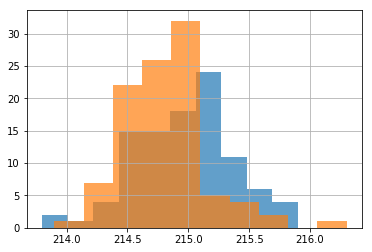

In [9]:
df.groupby('Status')['Length'].hist(alpha=0.7);

In [10]:
from pandas.plotting import scatter_matrix

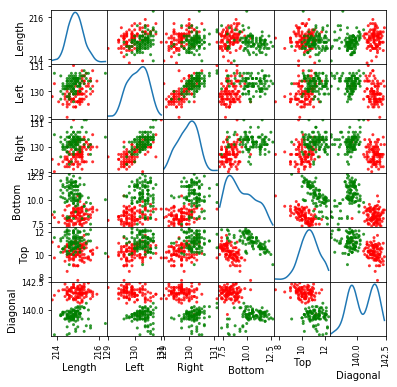

In [11]:
#Диаграмма рассеивания
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df, figsize=(6, 6), diagonal='kde', c=df['Status'].replace(colors), alpha=0.8);

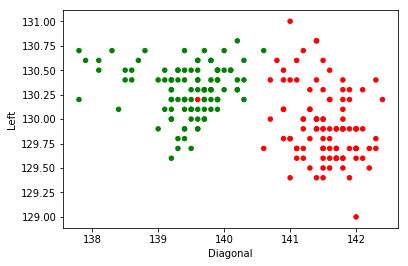

In [18]:
df.plot.scatter(x='Diagonal',y='Left',c=df['Status'].replace(colors))

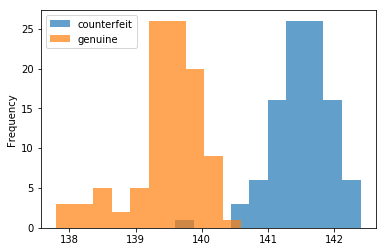

In [19]:
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.7)
plt.legend(loc='upper left');

In [13]:
#replace status to number
df.Status = df.Status.map({'genuine': 0, 'counterfeit': 1})

In [14]:
df.head(3)

,Length,Left,Right,Bottom,Top,Diagonal,Status
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1


In [16]:
#predict classification
df['PredictStatus'] = df.Diagonal.apply(lambda x: 1 if x > 140.5 else 0)

In [18]:
df[df.Status != df.PredictStatus]

,Length,Left,Right,Bottom,Top,Diagonal,Status,PredictStatus
69,214.9,130.2,130.2,8.0,11.2,139.6,1,0
112,215.4,130.7,131.1,9.7,11.8,140.6,0,1


In [20]:
res = 1.0 - len(df[df.Status != df.PredictStatus]) / len(df)
print('accuracy = %.3f%%' % (res*100))

accuracy = 99.000%
